### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `# YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. Never copy/paste any notebook cells. Inserting new cells is allowed, but it should not be necessary.
6. The notebook contains some hidden metadata which is important during our grading process. **Make sure not to corrupt any of this metadata!** The metadata may for example be corrupted if you copy/paste any notebook cells, or if you perform an unsuccessful git merge / git pull. It may also be pruned completely if using Google Colab, so watch out for this. Searching for "nbgrader" when opening the notebook in a text editor should take you to the important metadata entries.
7. Although we will try our very best to avoid this, it may happen that bugs are found after an assignment is released, and that we will push an updated version of the assignment to GitHub. If this happens, it is important that you update to the new version, while making sure the notebook metadata is properly updated as well. The safest way to make sure nothing gets messed up is to start from scratch on a clean updated version of the notebook, copy/pasting your code from the cells of the previous version into the cells of the new version.
8. If you need to have multiple parallel versions of this notebook, make sure not to move them to another directory.
9. Although not forced to work exclusively in the course `conda` environment, you need to make sure that the notebook will run in that environment, i.e. that you have not added any additional dependencies.

**FOR HA1, HA2 ONLY:** Failing to meet any of these requirements might lead to either a subtraction of points (at best) or a request for resubmission (at worst).

We advise you to perform the following steps before submission to ensure that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). This might require a bit of time, so plan ahead for this (and possibly use a cloud GPU in HA1 and HA2 for this step). Finally press the "Save and Checkout" button before handing in, to make sure that all your changes are saved to this .ipynb file.

### Fill in name of notebook file
This might seem silly, but the version check below needs to know the filename of the current notebook, which is not trivial to find out programmatically.

You might want to have several parallel versions of the notebook, and it is fine to rename the notebook as long as it stays in the same directory. **However**, if you do rename it, you also need to update its own filename below:

In [71]:
nb_fname = "IHA2.ipynb"

### Fill in group number and member names (use NAME2 and GROUP only for HA1 and HA2):

In [72]:
NAME1 = "Yuhong Zhou"
NAME2 = ""
GROUP = ""

### Check Python version

In [73]:
from platform import python_version_tuple

assert (
    python_version_tuple()[:2] == ("3", "11")
), "You are not running Python 3.11. Make sure to run Python through the course Conda environment."

### Check that notebook server has access to all required resources, and that notebook has not moved

In [74]:
import os

nb_dirname = os.path.abspath("")
assignment_name = os.path.basename(nb_dirname)
assert assignment_name in [
    "IHA1",
    "IHA2",
    "HA1",
    "HA2",
], "[ERROR] The notebook appears to have been moved from its original directory"

### Verify correct nb_fname

In [75]:
from IPython.display import HTML, display

try:
    display(
        HTML(
            r'<script>if("{nb_fname}" != IPython.notebook.notebook_name) {{ alert("You have filled in nb_fname = \"{nb_fname}\", but this does not seem to match the notebook filename \"" + IPython.notebook.notebook_name + "\"."); }}</script>'.format(
                nb_fname=nb_fname
            )
        )
    )
except NameError:
    assert False, "Make sure to fill in the nb_fname variable above!"

### Verify that your notebook is up-to-date and not corrupted in any way

In [76]:
import sys

sys.path.append("..")
from ha_utils import check_notebook_uptodate_and_not_corrupted

check_notebook_uptodate_and_not_corrupted(nb_dirname, nb_fname)

Matching current notebook against the following URL:
http://raw.githubusercontent.com/dml-cth/deep-machine-learning/master/home-assignments/IHA2/IHA2.ipynb
[SUCCESS] No major notebook mismatch found when comparing to latest GitHub version. (There might be minor updates, but even that is the case, submitting your work based on this notebook version would be acceptable.)


# IHA2 - Catching Pokemon

![](https://upload.wikimedia.org/wikipedia/en/4/46/Pokemon_Go.png)

In this home assignment, you'll apply roughly the same principles we used when doing logistic regression on the Iris dataset in Computer Lab 1, but on a different and very interesting dataset. We'll use the [Predict'em All dataset from Kaggle](https://www.kaggle.com/semioniy/predictemall). To download the dataset you will need a Kaggle account. This dataset consists of roughly 293,000 [pokemon](http://www.pokemongo.com/) sightings (historical appearances of Pokemon in the Pokemon Go game), with geographical coordinates, time, weather, population density, distance to pokestops/gyms etc. as features. A comprehensive list of all the features is available at [the dataset's homepage](https://www.kaggle.com/semioniy/predictemall).

The context is simple: you are a Pokemon hunter, and there are only three Pokemon left for you to complete your collection. You'll do anything to capture them, including changing where you'll spend your next holidays! You know that some Pokemon only spawn in certain places of the world. Since you like machine learning so much, you figure it would be a great idea to train a classifier that, based on a location's longitude and latitude, can tell us which Pokemon is more likely to appear there.

The assignment is broken down into six steps.

1. Loading the data and extracting the desired subset of it
2. Visualization of the dataset
3. Preprocessing
4. Training
5. Evaluation
6. Exploration

Feel free to temporarily add cells wherever you see fit, and play around with this notebook as much as you want when developing the solutions. However, the solution you upload to Canvas must have the exact format shown here, with only the cells present here.

Don't restrict yourself only to what was taught so far. Some of the tasks might require you to search for new information. However, **be sure that you do the assignment using PyTorch** since we will be using it through the following assignments as well. [The Python docs](https://docs.python.org/3/), [PyTorch docs](https://pytorch.org/docs/stable/index.html), [stackoverflow](https://stackoverflow.com/), and Google are your friends!

**Hint:** Solving Computer Lab 1 (CL1) is a good way to get prepared for this assignment.

To pass this assignment, your solutions should pass all tests (`assert`-statements). Note that the tests shown to you are not exhaustive, and additional hidden tests exist for some of the tasks. Further, similar to IHA1, this notebook contains some questions where we ask you to reflect upon some results. These questions will not be graded in detail, but we still expect you to answer them.

## 0. Imports

Import any necessary modules here.

In [77]:
# YOUR CODE HERE
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Loading and extracting subset

The first step consists of filtering the dataset by the three Pokémon you are interested at. 

Start by loading the `'300k.csv'` file using pandas. If you haven't downloaded it yet, either use [this link](https://www.kaggle.com/semioniy/predictemall) to do so (and place the file in the same folder as this notebook), or simply run the cell below. You might have to [create a new API token](https://www.kaggle.com/settings/account) before the commands work.

In [78]:
!kaggle datasets download -d semioniy/predictemall
!unzip -u predictemall.zip
!rm -rf predictemall.zip 300k_arff 300k.arff 300k_csv

Dataset URL: https://www.kaggle.com/datasets/semioniy/predictemall
License(s): unknown
100%|████████████████████████████████████████| 140M/140M [00:04<00:00, 40.0MB/s]
100%|████████████████████████████████████████| 140M/140M [00:04<00:00, 32.8MB/s]
Archive:  predictemall.zip
  inflating: 300k.arff               
  inflating: 300k_arff/300k.arff     
  inflating: 300k_csv/300k.csv       


In [79]:
# TODO: load the dataset using pandas to a dataframe called df
# YOUR CODE HERE
df = pd.read_csv('300k.csv', low_memory = False)

In [80]:
assert df.shape == (
    296021,
    208,
), f"Dataframe has not the right shape. {df.shape} != (296021, 208)"
assert isinstance(df, pd.DataFrame), f"df is not a dataframe. Was {type(df)}"

Modify `df` to only have the columns `latitude`, `longitude`, and `class`.

In [81]:
# YOUR CODE HERE
df = df[['latitude','longitude','class']]

In [82]:
assert len(df.columns) == 3, "There should be 3 columns"
assert len(df.shape) == 2, "The dataframe should be 2 dimensional"
assert df.shape == (296021, 3), "Wrong shape of the dataframe"
assert "latitude" in df.columns, "latitude column is missing"
assert "longitude" in df.columns, "longitude column is missing"
assert "class" in df.columns, "class column is missing"

Note that the `class` column specifies which pokemon it is. However, it only has the numerical id of the pokemon. For your convenience, we provide the dictionary `name_dict` to convert between ids and names (we'll do this soon).

In [154]:
from utils import name_dict

In [155]:
# example usage (you can index either by name or id)
print(name_dict["Gengar"])
print(name_dict[94])

94
Gengar


In [156]:
# for convenience, let's add a new column to the dataframe with the name of the pokemon
df["name"] = df["class"].apply(lambda x: name_dict[x])
print(df.head())

  appearedTimeOfDay  class    name
0             night     16  Pidgey
1             night    133   Eevee
2             night     16  Pidgey
3             night     13  Weedle
4             night    133   Eevee


We are only interested in three specific pokemon: Diglett, Seel, and Tauros.

<table style="width:100%">
  <tr>
    <th> <center>Diglett</center> </th>
    <th> <center>Seel</center> </th> 
    <th> <center>Tauros</center> </th>
  </tr>
  <tr>
    <td><img src=https://assets.pokemon.com/assets/cms2/img/pokedex/full/050_f2.png alt=Digglet></td>
    <td><img src=https://pokemon.gamepedia.com/media/pokemon.gamepedia.com/thumb/f/f1/Seel.png/200px-Seel.png?version=2c32fbe0af2d0da707e5dbcb40472fbf></td>
    <td><img src=https://www.pokemon.com/static-assets/content-assets/cms2/img/pokedex/full/128.png></td>
  </tr>
</table>



Filter the dataset to contain only these three types of pokemon and save it in the DataFrame `filtered_df`.

In [86]:
# YOUR CODE HERE
filtered_df = df[df['name'].isin(['Diglett', 'Seel', 'Tauros'])]

print(
    f"We have {len(filtered_df)} instances of Diglett, Seel, and Tauros in the dataset."
)

We have 2083 instances of Diglett, Seel, and Tauros in the dataset.


In [87]:
assert len(np.unique(filtered_df["class"])) == 3, "There should be 3 unique classes."
assert filtered_df.shape == (
    2083,
    4,
), "The shape of the filtered dataframe is incorrect."

In an earlier cell, you could see that the dataset has 208 features per pokemon sighting (`df.shape == (296021, 208)`). Why do we only use the `longitude` and `latitude` features and not all the features? 

**Your answer:**   
Because we want to predict which Pokémon species is likely to appear based on geographic location. We only need to consider the `longitude` and `latitude` features.

## 2. Visualization of the dataset

The second step consists of visualizing the dataset. This will help you understand the distribution of the features and get an idea of how hard the task will be.

Plot a bar chart of the number of occurrences of each class.

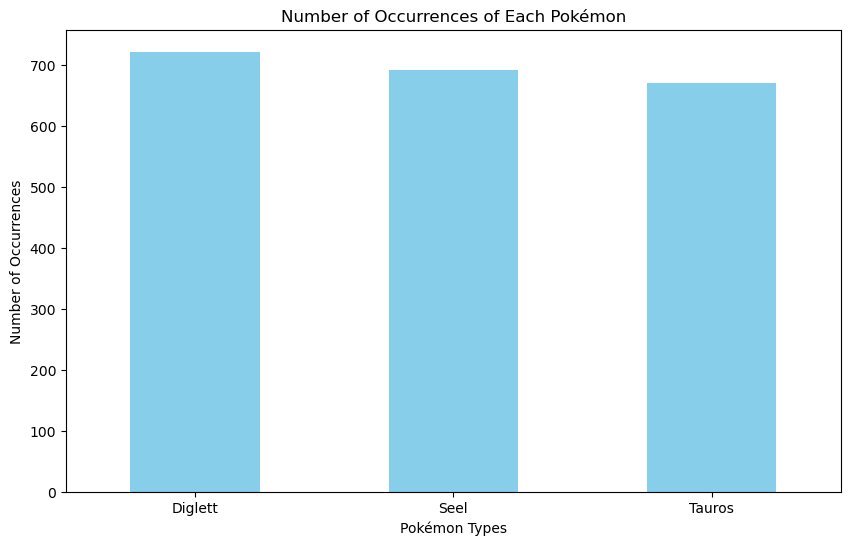

In [88]:
# YOUR CODE HERE
# Count occurrences of each Pokémon
counts = filtered_df['name'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='skyblue')
plt.xlabel('Pokémon Types')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences of Each Pokémon')
plt.xticks(rotation=0)  # Rotate labels if needed
plt.show()

Is the dataset balanced? Why/why not? Why is this important?

**Your answer:**   
The dataset is balanced. Since the number of occurrences of each Pokémon is approximately equal, the dataset appears to be balanced. It is important because it ensures that any model trained on this data will have an equal opportunity to learn from each class, which can help improve the model’s performance.

Plot a scatter plot where the first dimension is longitude, the second is latitude, and each point is a Pokemon. Further, the color of each point should represent which Pokemon it is. Lastly, the marker at each point should be an `'x'`. Make sure to label each axis.

Hints:

- The `scatter` method from `matplotlib` accepts an argument called `c`.
- The `scatter` method also accepts an argument called `marker`.

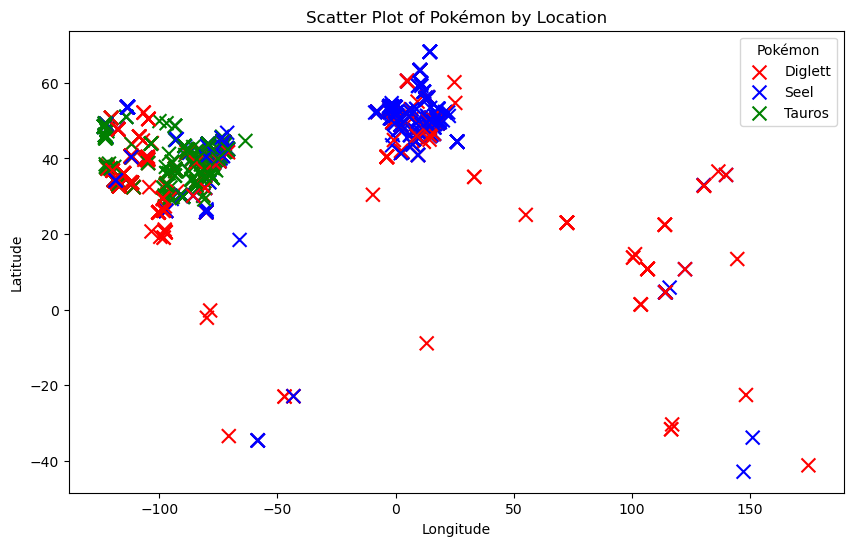

In [89]:
# YOUR CODE HERE
longitude = filtered_df['longitude']
latitude = filtered_df['latitude']
names = filtered_df['name']

# Set each Pokémon to unique colors
colors = {'Diglett': 'red', 'Seel': 'blue', 'Tauros': 'green'}
color_values = names.map(colors)

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(longitude, latitude, c=color_values, marker='x', s=100)

# Create a legend
legend_labels = {pokemon: color for pokemon, color in colors.items()}
for pokemon, color in legend_labels.items():
    plt.scatter([], [], c=color, marker='x', s=100, label=pokemon) 

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Pokémon by Location')
plt.legend(title='Pokémon')
plt.show()

Is there any other visualization you think would be useful? If so, insert them here.

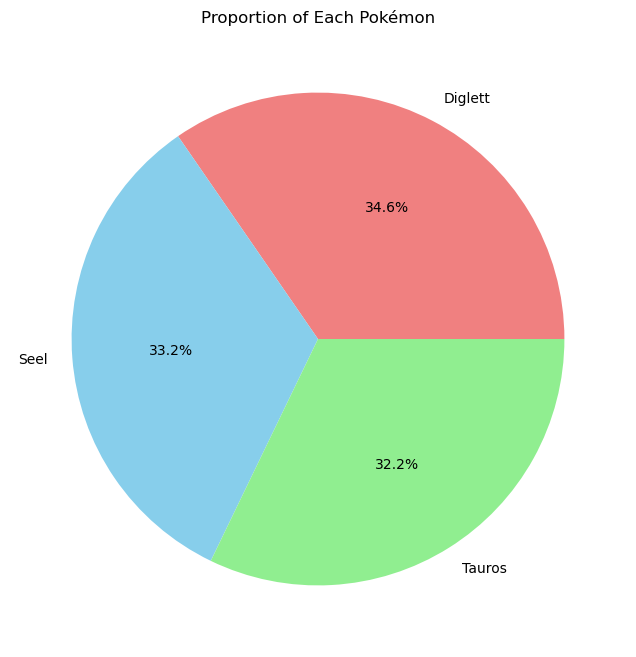

In [90]:
# YOUR CODE HERE
# Count occurrences of each Pokémon
pokemon_counts = filtered_df['name'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
pokemon_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'skyblue', 'lightgreen'])
plt.ylabel('')
plt.title('Proportion of Each Pokémon')
plt.show()

How hard do you think the problem is? Which classes can/cannot be easily separated?


**Your answer:**  
The problem’s difficulty depends on the overlap between features, especially geographic location. Since the Pokémon tend to cluster in the same regions, the problem becomes difficult. Classes like Diglett and Tauros could be challenging to separate based on overlapping habitats.

Which accuracy do you expect to achieve?

**Your answer:**   
Since the classes overlap significantly,the accuracy might be closer to 70%.

## 3. Preprocessing

The third step consists of processing the data before training, such as dividing the dataset into training, validation, and test sets. Some tranformations can also be applied to the dataset in order to improve the performance of the network. We will use some PyTorch utilities to help us with this task.

Start by creating the input and output vectors, `x` and `y`. The input should be latitude and longitude, and the output should be the class of the pokemon. Note that you cannot use the class names directly, as they are strings. You need to introduce some mapping to convert them to integers (0, 1, and 2) or one-hot vectors.

In [91]:
# YOUR CODE HERE
x = filtered_df[['latitude', 'longitude']].values
x = x.astype(np.float32) 

class_map = {'Diglett': 0, 'Seel': 1, 'Tauros': 2}
y = filtered_df['name'].map(class_map).values 

print(f"Shape of input data: {x.shape}")
print(f"Shape of labels: {y.shape}")

Shape of input data: (2083, 2)
Shape of labels: (2083,)


In [92]:
assert isinstance(x, np.ndarray), "x should be a numpy array"
assert isinstance(y, np.ndarray), "y should be a numpy array"

assert x.shape[0] == y.shape[0], "x and y should have the same number of samples"
assert x.shape[-1] == 2, "x should have 2 features"
assert x.dtype == np.float32, "x should be of type float32"
if y.shape[-1] == 3:  # one-hot encoded
    assert y.max() == 1, "one-hot encoded y, at least one entry should be 1"
    assert y.min() == 0, "one-hot encoded y, at least one entry should be 0"
    assert y.sum(axis=1).all() == 1
else:  # label encoded
    assert y.max() == 2, "label encoded y, should have a max value of 2"
    assert y.min() == 0, "label encoded y, should have a min value of 0"

Separate your data into training (55%), validation (25%) and test sets (20%) and save them as `dataset_train`, `dataset_val`, `dataset_test`. If you wish to apply any transformation to the dataset, do it here as well. 

Further, create a class, PokemonDataset, inheriting from PyTorch [`Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) and use this for storing the data. In other words, `dataset_train`, `dataset_val`, `dataset_test` should have type PokemonDataset. You will need to implement a `__getitem__`, `__len__` and `__init__` method. Although perhaps a bit overkill for this assignment, it is a good practice for handling datasets in PyTorch.

Last, instantiate a [`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for each dataset, i.e., `loader_train`, `loader_val`, `loader_test`. This will fetch samples from the datasets and combine them into batches. Remember to select a suitable batch size.

In [93]:
# YOUR CODE HERE
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 0.45, random_state = 42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = 0.44, random_state = 42)

class PokemonDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype = torch.float32)
        self.labels = torch.tensor(labels, dtype = torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

dataset_train = PokemonDataset(x_train, y_train)
dataset_val = PokemonDataset(x_val, y_val)
dataset_test = PokemonDataset(x_test, y_test)

loader_train = DataLoader(dataset_train, batch_size = 32, shuffle = True)
loader_val = DataLoader(dataset_val, batch_size = 32, shuffle = False)
loader_test = DataLoader(dataset_test, batch_size = 32, shuffle = False)

In [94]:
assert isinstance(
    dataset_train, PokemonDataset
), "dataset_train should be an instance of PokemonDataset"
assert isinstance(
    dataset_val, PokemonDataset
), "dataset_val should be an instance of PokemonDataset"
assert isinstance(
    dataset_test, PokemonDataset
), "dataset_test should be an instance of PokemonDataset"

assert (
    abs(len(dataset_train) / len(x) - 0.55) < 0.01
), "dataset_train has the wrong length, should be 55% of the data"
assert (
    abs(len(dataset_val) / len(x) - 0.25) < 0.01
), "dataset_val has the wrong length, should be 25% of the data"
assert (
    abs(len(dataset_test) / len(x) - 0.20) < 0.01
), "dataset_test has the wrong length, should be 20% of the data"

assert isinstance(
    loader_train, DataLoader
), "loader_train should be an instance of DataLoader"
assert isinstance(
    loader_val, DataLoader
), "loader_val should be an instance of DataLoader"
assert isinstance(
    loader_test, DataLoader
), "loader_test should be an instance of DataLoader"

assert len(loader_train), "loader_train should have a length"
assert len(loader_val), "loader_val should have a length"
assert len(loader_test), "loader_test should have a length"

## 4. Training

The fourth step is where you will choose the architecture of your network (number of hidden layers, activation functions, etc.), optimizer, loss function and then train the network. 

Start by implementing a training loop, and a helper function to calculate the accuracy. The training loop should calculate the loss and accuracy for both the training and validation set and print it with some regular interval (each epoch, or every few epochs, for instance). It can also be helpful to plot the loss and accuracy for both the training and validation set, either in the training loop, or after it has finished (i.e., you have to store the values during training and return them).

We have prepared the `train_model` function with the arguments you need, but you have access to *args and **kwargs if you want to pass additional arguments to the function.

In [95]:
from typing import Callable, Union

import torch
import torch.nn as nn
import torch.utils


def accuracy(y_hat: torch.Tensor, y: torch.Tensor) -> torch.Tensor:
    """
    Compute the accuracy of the model.

    Args:
    y_hat: torch.Tensor: The model predictions (probability per class), shape: [batch_size, num_classes]
    y: torch.Tensor: The true labels, shape: [batch_size]

    Returns:
    torch.Tensor: The accuracy of the model
    """
    # YOUR CODE HERE        
    predicted = y_hat.argmax(dim=1)
    
    acc = torch.tensor(torch.sum(predicted == y).item() / len(y))

    
    return acc


def train_model(
    model: nn.Module,
    optimizer: torch.optim,
    loss_fn: Union[Callable, nn.Module],
    num_epochs: int,
    train_dataloader: torch.utils.data.DataLoader,
    val_dataloader: torch.utils.data.DataLoader,
    device: Union[str, torch.device],
    *args,
    **kwargs,
):
    """
    Train the model.

    Args:
    model: nn.Module: The neural network model
    optimizer: torch.optim: The optimizer used to update the model parameters
    loss_fn: Union[Callable, nn.Module]: The loss function used to compute the loss
    num_epochs: int: The number of epochs to train the model
    train_dataloader: torch.utils.data.DataLoader: The training dataloader
    val_dataloader: torch.utils.data.DataLoader: The validation dataloader
    device: Union[str, torch.device]: The device to run the training on
    *args: Additional arguments to pass to the train function
    **kwargs: Additional keyword arguments to pass to the train function

    """

    # YOUR CODE HERE
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        # --------------------
        # Training Phase
        # --------------------
        model.train()
        train_loss = 0.0

        for inputs, labels in train_dataloader:

            # Zero gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)

            # Compute loss
            loss = loss_fn(outputs, labels)

            # Backward pass
            loss.backward()

            # Update parameters
            optimizer.step()

            # Track loss and accuracy
            train_loss += loss.item() * inputs.size(0)
          
        # Calculate average loss and accuracy for training
        train_loss_epoch = train_loss / len(train_dataloader.dataset)
        train_acc_epoch = accuracy(outputs,labels)
        train_losses.append(train_loss_epoch)
        train_accuracies.append(train_acc_epoch)


        # --------------------
        # Validation Phase
        # --------------------
        model.eval()
        val_loss = 0.0

        with torch.no_grad():
            for inputs, labels in val_dataloader:

                # Forward pass
                outputs = model(inputs)

                # Compute loss
                loss = loss_fn(outputs, labels)

                # Track loss and accuracy for validation
                val_loss += loss.item() * inputs.size(0)

        # Calculate average loss and accuracy for validation
        val_loss_epoch = val_loss / len(val_dataloader.dataset)
        val_acc_epoch = accuracy(outputs,labels)
        val_losses.append(val_loss_epoch)
        val_accuracies.append(val_acc_epoch)

        # Print training and validation loss and accuracy for the current epoch with line breaks
        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'Training Loss: {train_loss_epoch:.4f}, Training Accuracy: {train_acc_epoch*100:.2f}%')
        print(f'Validation Loss: {val_loss_epoch:.4f}, Validation Accuracy: {val_acc_epoch*100:.2f}%\n')
    
    return train_losses, train_accuracies, val_losses, val_accuracies


Next, we'll test that your training loop is correct. A [common sanity check in deep learning](https://karpathy.github.io/2019/04/25/recipe/) is to overfit to a small dataset, like a single batch of data. This ensures that shapes and devices are correctly set, and the network can learn/memorize the training data, which is a good starting point before training on the full dataset.

In [96]:
def test_train_loop():
    import torch.nn as nn
    import torch.optim as optim
    import torch.utils.data as data

    # init simple model, optimizer, loss_fn, dataloaders
    linear_model = nn.Linear(2, 3)
    optimizer = optim.SGD(linear_model.parameters(), lr=0.01)
    loss_fn = nn.CrossEntropyLoss()
    testing_loader_train = data.DataLoader(
        data.TensorDataset(torch.randn(2, 2), torch.randint(0, 3, (2,)))
    )
    testing_loader_val = data.DataLoader(
        data.TensorDataset(torch.randn(2, 2), torch.randint(0, 3, (2,)))
    )

    # copy parameters to check for changes
    params_before_training = list(linear_model.parameters())
    params_before_training = [p.clone().to("cpu") for p in params_before_training]

    print("Testing training loop, CPU")
    train_model(
        model=linear_model,
        optimizer=optimizer,
        loss_fn=loss_fn,
        num_epochs=100,
        train_dataloader=testing_loader_train,
        val_dataloader=testing_loader_val,
        device="cpu",
    )
    if torch.cuda.is_available():
        print("Testing training loop, CUDA")
        train_model(
            model=linear_model,
            optimizer=optimizer,
            loss_fn=loss_fn,
            num_epochs=100,
            train_dataloader=testing_loader_train,
            val_dataloader=testing_loader_val,
            device="cuda" if torch.cuda.is_available() else "cpu",
        )

    params_after_training = list(linear_model.parameters())
    params_after_training = [p.clone().to("cpu") for p in params_after_training]
    for p_before, p_after in zip(params_before_training, params_after_training):
        assert torch.any(
            p_before != p_after
        ), "Model parameters did not change during training"

    # check that we could overfit a single example
    (x, y) = next(iter(testing_loader_train))
    x.to("cpu")
    y.to("cpu")
    linear_model.to("cpu")
    assert (
        linear_model(x).argmax().item() == y.item()
    ), "Model could not overfit a single example"


def test_accuracy():
    y_pred = torch.tensor([[0.1, 0.8, 0.1], [0.3, 0.4, 0.3], [0.1, 0.1, 0.8]])
    y_true = torch.tensor([1, 0, 2])
    acc = accuracy(y_pred, y_true)
    assert isinstance(acc, torch.Tensor), "Accuracy should be a torch.Tensor"
    assert torch.isclose(acc, torch.tensor(2 / 3)), f"Accuracy is {acc}, expected 2/3"


try:
    test_train_loop()
except Exception as e:
    print(e)
    assert False, "Training test failed, see error above"

test_accuracy()

Testing training loop, CPU
Epoch [1/100]
Training Loss: 1.1033, Training Accuracy: 0.00%
Validation Loss: 1.5787, Validation Accuracy: 0.00%

Epoch [2/100]
Training Loss: 1.0871, Training Accuracy: 0.00%
Validation Loss: 1.5959, Validation Accuracy: 0.00%

Epoch [3/100]
Training Loss: 1.0714, Training Accuracy: 0.00%
Validation Loss: 1.6130, Validation Accuracy: 0.00%

Epoch [4/100]
Training Loss: 1.0560, Training Accuracy: 0.00%
Validation Loss: 1.6301, Validation Accuracy: 0.00%

Epoch [5/100]
Training Loss: 1.0411, Training Accuracy: 0.00%
Validation Loss: 1.6470, Validation Accuracy: 0.00%

Epoch [6/100]
Training Loss: 1.0266, Training Accuracy: 0.00%
Validation Loss: 1.6638, Validation Accuracy: 0.00%

Epoch [7/100]
Training Loss: 1.0125, Training Accuracy: 0.00%
Validation Loss: 1.6806, Validation Accuracy: 0.00%

Epoch [8/100]
Training Loss: 0.9987, Training Accuracy: 0.00%
Validation Loss: 1.6972, Validation Accuracy: 0.00%

Epoch [9/100]
Training Loss: 0.9854, Training Accurac

Now, create a neural network using PyTorch. You can use any architecture you want. Save the model in the variable `model`.

In [97]:
# YOUR CODE HERE
class PokemonNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2,16),
            nn.BatchNorm1d(16),
            nn.LeakyReLU(),

            nn.Linear(16,16),
            nn.BatchNorm1d(16),
            nn.LeakyReLU(),

            nn.Linear(16,16),
            nn.BatchNorm1d(16),
            nn.LeakyReLU(),
            nn.Linear(16, 3),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits 

model = PokemonNN()


In [98]:
assert isinstance(model, nn.Module)


# check that we can run input of shape (batch_size, 2) through the model, with batch_size=16
def test_model_output_shape(model):
    is_model_on_cuda = next(model.parameters()).is_cuda
    device = torch.device("cuda" if is_model_on_cuda else "cpu")
    assert (
        len(model(torch.randn(16, 2, device=device))) == 16
    ), "The model should not change the batch size"


test_model_output_shape(model)

Train the network. 

For you to pass this assignment, you must obtain an accuracy on the test set greater than 60%. You can use the validation set as a proxy during development, but remember that they can differ slightly. We use the test set, as this better represents the performance of the model on new, unseen data (which is the ultimate goal).

To reach the level of performance, it may be necessary to search for a good architecture by trying several different ones. Last, if you want a challenge, try getting an accuracy greater than 75% (our reference solution achieves ~78%).

Again, it might be useful to plot the loss and accuracy (for training and validation) during training.

Epoch [1/100]
Training Loss: 1.0349, Training Accuracy: 36.00%
Validation Loss: 0.9888, Validation Accuracy: 53.85%

Epoch [2/100]
Training Loss: 0.9038, Training Accuracy: 60.00%
Validation Loss: 0.8724, Validation Accuracy: 69.23%

Epoch [3/100]
Training Loss: 0.8374, Training Accuracy: 60.00%
Validation Loss: 0.8308, Validation Accuracy: 69.23%

Epoch [4/100]
Training Loss: 0.8187, Training Accuracy: 56.00%
Validation Loss: 0.8063, Validation Accuracy: 61.54%

Epoch [5/100]
Training Loss: 0.8006, Training Accuracy: 72.00%
Validation Loss: 0.7926, Validation Accuracy: 61.54%

Epoch [6/100]
Training Loss: 0.7834, Training Accuracy: 76.00%
Validation Loss: 0.7821, Validation Accuracy: 61.54%

Epoch [7/100]
Training Loss: 0.7692, Training Accuracy: 80.00%
Validation Loss: 0.7703, Validation Accuracy: 61.54%

Epoch [8/100]
Training Loss: 0.7598, Training Accuracy: 56.00%
Validation Loss: 0.7630, Validation Accuracy: 61.54%

Epoch [9/100]
Training Loss: 0.7602, Training Accuracy: 68.00%
V

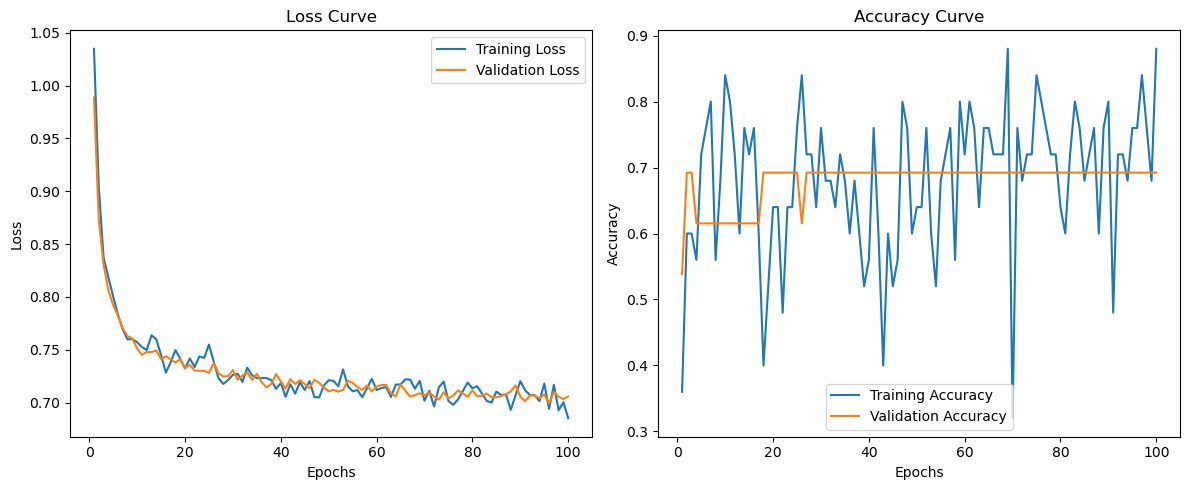

accuracy on the test set: 62.07%


In [99]:
# YOUR CODE HERE
loss_fn = nn.CrossEntropyLoss()

# define optimizer
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.0005)

# device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# number of epochs
num_epochs = 100 

# using train model
train_losses, train_accuracies, val_losses, val_accuracies = train_model(
    model=model,
    optimizer=optimizer,
    loss_fn=loss_fn,
    num_epochs=num_epochs,
    train_dataloader=loader_train,
    val_dataloader=loader_val,
    device=device
)

epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

# Plotting Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Plot Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()


model.eval()

with torch.no_grad():
    for inputs, labels in loader_test:
        outputs = model(inputs)

test_accuracy = accuracy(outputs,labels)
print(f"accuracy on the test set: {test_accuracy*100:.2f}%")

Let's have a look at what we have learned! Create a function that visualizes the decision regions of the network. Overlap it with the points corresponding to the training data and validations data, such as in Section 2, by using the scatter plot function. The training and validation points should have different markers and/or colors. Last, call the function to visualize the decision regions of your network.

Hint: A simple way to show the decision region is to generate a lot of points within a predefined range of longitude and latitude and apply your network to it. However, feel free to explore other ways.

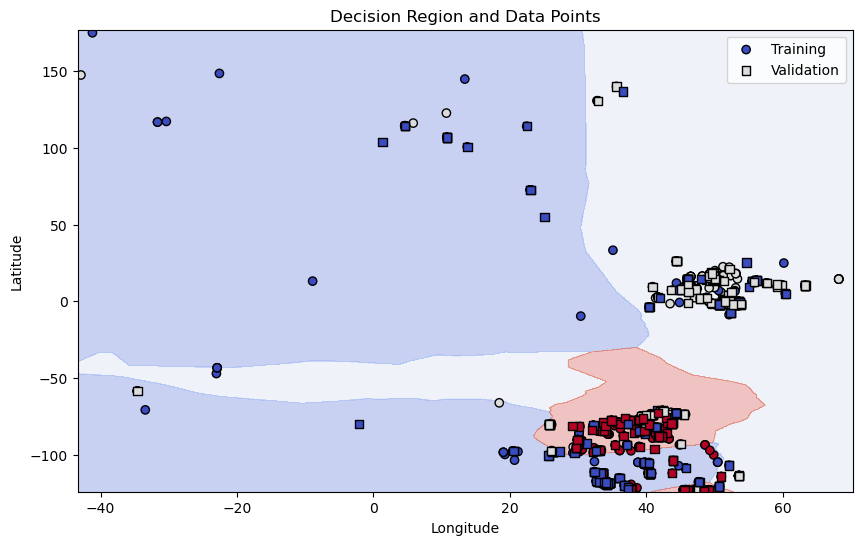

In [100]:
def plot_decision_region(model: nn.Module, x_train, y_train, x_val, y_val):
    """
    Plot the decision region of the model.

    Args:
    model: nn.Module: The trained model
    x_train: The training features, use whatever representation you prefer (e.g. numpy array, torch.Tensor, dataset, dataloader)
    y_train: The training labels, use whatever representation you prefer (e.g. numpy array, torch.Tensor, dataset, dataloader)
    x_val: The validation features, use whatever representation you prefer (e.g. numpy array, torch.Tensor, dataset, dataloader)
    y_val: The validation labels, use whatever representation you prefer (e.g. numpy array, torch.Tensor, dataset, dataloader)
    """
    # YOUR CODE HERE
    # Set model to evaluation mode
    model.eval() 

    # Convert data to numpy if it's not
    if isinstance(x_train, torch.Tensor):
        x_train = x_train.cpu().numpy()
    if isinstance(y_train, torch.Tensor):
        y_train = y_train.cpu().numpy()
    if isinstance(x_val, torch.Tensor):
        x_val = x_val.cpu().numpy()
    if isinstance(y_val, torch.Tensor):
        y_val = y_val.cpu().numpy()

    # Determine the min and max values for both dimensions
    x_min, x_max = x_train[:, 0].min() - 0.5, x_train[:, 0].max() + 2
    y_min, y_max = x_train[:, 1].min() - 0.5, x_train[:, 1].max() + 2

    # Create a meshgrid over the feature space
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000),
                         np.linspace(y_min, y_max, 1000))

    # Flatten the grid to make predictions on each point
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Convert grid to tensor and pass it through the model
    grid_tensor = torch.tensor(grid, dtype=torch.float32)

    with torch.no_grad():
        preds = model(grid_tensor)
        preds = preds.argmax(dim=1).numpy().reshape(xx.shape) 

    # Plot decision boundary by coloring the regions
    plt.figure(figsize = (10, 6))
    plt.contourf(xx, yy, preds, alpha = 0.3, cmap='coolwarm')

    # Plot the training points
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, marker='o', cmap='coolwarm', edgecolor='k', label='Training')

    # Plot the validation points
    plt.scatter(x_val[:, 0], x_val[:, 1], c=y_val, marker='s', cmap='coolwarm', edgecolor='k', label='Validation')

    plt.legend()
    plt.title("Decision Region and Data Points")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

plot_decision_region(model, x_train, y_train, x_val, y_val)   

Do the learned decision regions look like you would expect? Can they be improved? In what sense, and how would that change your model? Please comment on your results. 

**Your answer:**   
Yes. the learned decision regions look like what I would expect. Improvements can be made by tuning the model architecture (depth, width, activation functions).

### 4.1. Model capacity and generalization

Now we have all the neccessary tools to do a small experiment on model capacity and implications on generalization.

Begin by defining a neural network `tiny_model` with a single linear layer and appropriate activation function. Then, train the network until convergence (should be fast).

Epoch [1/100]
Training Loss: 12.8756, Training Accuracy: 32.00%
Validation Loss: 11.3562, Validation Accuracy: 30.77%

Epoch [2/100]
Training Loss: 10.7642, Training Accuracy: 16.00%
Validation Loss: 9.9165, Validation Accuracy: 23.08%

Epoch [3/100]
Training Loss: 9.5647, Training Accuracy: 32.00%
Validation Loss: 8.9509, Validation Accuracy: 30.77%

Epoch [4/100]
Training Loss: 8.6665, Training Accuracy: 16.00%
Validation Loss: 8.1363, Validation Accuracy: 30.77%

Epoch [5/100]
Training Loss: 7.9030, Training Accuracy: 28.00%
Validation Loss: 7.4958, Validation Accuracy: 38.46%

Epoch [6/100]
Training Loss: 7.3511, Training Accuracy: 24.00%
Validation Loss: 7.0205, Validation Accuracy: 38.46%

Epoch [7/100]
Training Loss: 6.9140, Training Accuracy: 12.00%
Validation Loss: 6.6292, Validation Accuracy: 30.77%

Epoch [8/100]
Training Loss: 6.5279, Training Accuracy: 28.00%
Validation Loss: 6.2853, Validation Accuracy: 30.77%

Epoch [9/100]
Training Loss: 6.1781, Training Accuracy: 8.00%

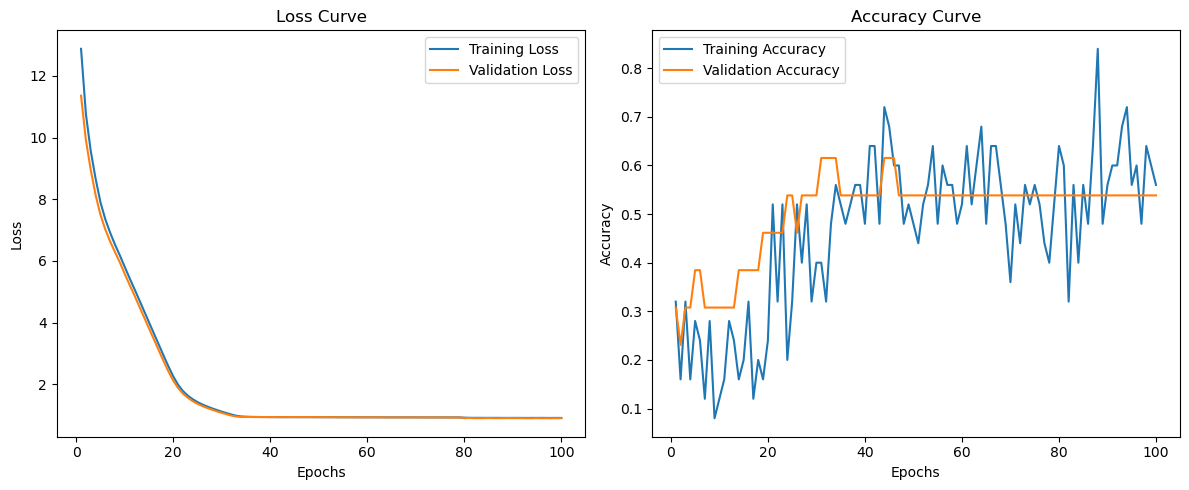

accuracy on the test set: 62.07%


In [110]:
# YOUR CODE HERE
class TinyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc = nn.Sequential(
            nn.Linear(2, 3),
            nn.LeakyReLU(),
        )
    
    def forward(self, x):
        logits = self.fc(x)
        return logits

# Initialize the model 
tiny_model = TinyModel()

loss_fn = nn.CrossEntropyLoss()

# define optimizer
optimizer = torch.optim.RMSprop(tiny_model.parameters(), lr=0.0005)

# device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# number of epochs
num_epochs = 100 

# using train model
train_losses, train_accuracies, val_losses, val_accuracies = train_model(
    model=tiny_model,
    optimizer=optimizer,
    loss_fn=loss_fn,
    num_epochs=num_epochs,
    train_dataloader=loader_train,
    val_dataloader=loader_val,
    device=device
)

epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

# Plotting Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Plot Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

model.eval()

with torch.no_grad():
    for inputs, labels in loader_test:
        outputs = model(inputs)

test_accuracy = accuracy(outputs,labels)
print(f"accuracy on the test set: {test_accuracy*100:.2f}%")


In [111]:
assert isinstance(tiny_model, nn.Module), "tiny_model should be a torch.nn.Module"
test_model_output_shape(tiny_model)

Now, draw the decision regions of the network as you did in the previous section. Before running the code, think about what you expect to see. What will the regions look like? How will they differ from the previous ones?

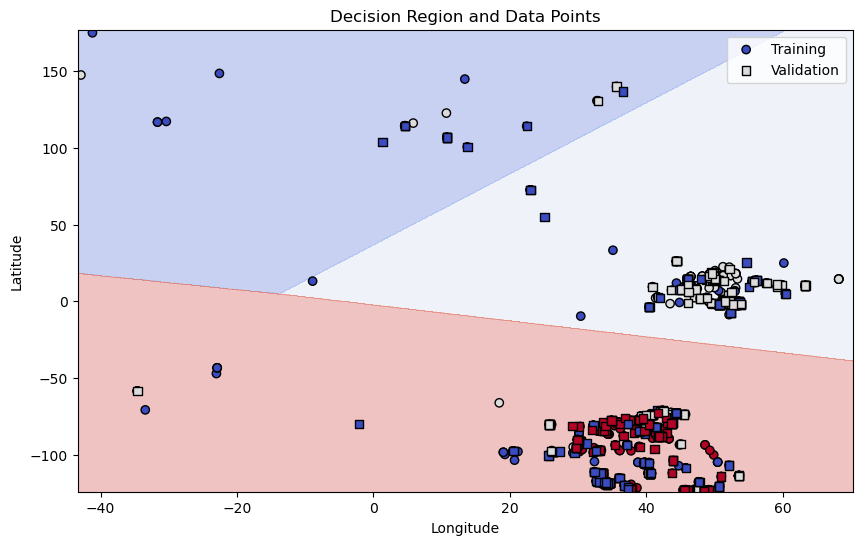

In [112]:
# YOUR CODE HERE
plot_decision_region(tiny_model, x_train, y_train, x_val, y_val)   

Are the decision regions any different? Why/why not? What does this tell you about the model capacity and generalization?

**Your answer:**   
The decision regions is vey different, their edges are linear. Since the tiny model has very limited capacity due to its simple architecture. It can only produce linear decision boundaries, which might not be sufficient for complex data distributions. 

Next, create a neural network `large_model` with many layers and/or hidden units. Try to maximize the training accuracy (0.7-0.8). Getting these models to converge might be a bit tricky, so you might have to adjust the learning rate, the optimizer, etc. Also, might be easier to have a wide model (large number of hidden units, say 1024 per layer) than a deep model (more than 4 layers).

Feel free to experiment, but if you get stuck, our model is a MLP with an input layer, 4 hidden layers with 1024 units each, and an output layer. We used the ReLU activation function between each layer and a softmax for the output layer. We used the Adam optimizer with a learning rate of 0.003 and a batch size of 512. We trained for at least a few hundred epochs. Also, normalizing the input can be helpful (zero mean and unit variance).

/var/folders/5p/cyjb4xx91l999l2scxfzx5vw0000gn/T/ipykernel_10863/3392219495.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.features = torch.tensor(features, dtype = torch.float32)


Epoch [1/200]
Training Loss: 1.0697, Training Accuracy: 44.63%
Validation Loss: 0.9649, Validation Accuracy: 46.15%

Epoch [2/200]
Training Loss: 0.9396, Training Accuracy: 55.37%
Validation Loss: 0.9152, Validation Accuracy: 53.85%

Epoch [3/200]
Training Loss: 0.8955, Training Accuracy: 69.42%
Validation Loss: 0.9158, Validation Accuracy: 53.85%

Epoch [4/200]
Training Loss: 0.8809, Training Accuracy: 72.73%
Validation Loss: 0.8702, Validation Accuracy: 69.23%

Epoch [5/200]
Training Loss: 0.8624, Training Accuracy: 70.25%
Validation Loss: 0.8685, Validation Accuracy: 69.23%

Epoch [6/200]
Training Loss: 0.8458, Training Accuracy: 69.42%
Validation Loss: 0.8579, Validation Accuracy: 69.23%

Epoch [7/200]
Training Loss: 0.8397, Training Accuracy: 71.07%
Validation Loss: 0.8595, Validation Accuracy: 61.54%

Epoch [8/200]
Training Loss: 0.8384, Training Accuracy: 74.38%
Validation Loss: 0.8457, Validation Accuracy: 69.23%

Epoch [9/200]
Training Loss: 0.8323, Training Accuracy: 76.03%
V

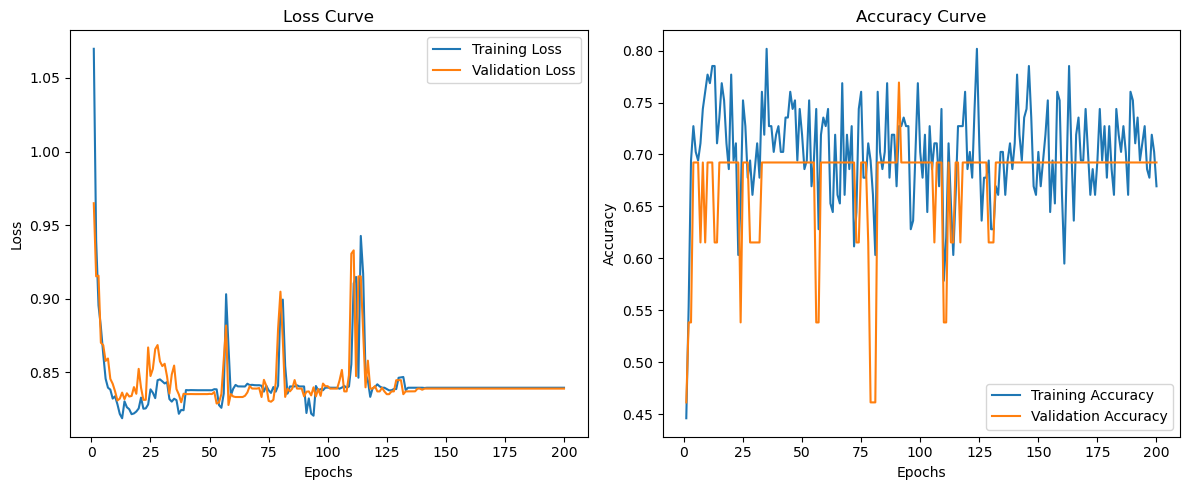

accuracy on the test set: 62.07%


In [116]:
# YOUR CODE HERE
class LargeModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc = nn.Sequential(
            nn.Linear(2, 1024),
            nn.LeakyReLU(),
            nn.Linear(1024, 1024),
            nn.LeakyReLU(),
            nn.Linear(1024, 1024),
            nn.LeakyReLU(),
            nn.Linear(1024, 1024),
            nn.LeakyReLU(),
            nn.Linear(1024, 3),
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.fc(x)
        return torch.softmax(logits, dim=1)


# Initialize the model 
large_model = LargeModel()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Normalize the training data
x_train_normalized = torch.tensor(scaler.fit_transform(x_train), dtype=torch.float32)
x_val_normalized = torch.tensor(scaler.transform(x_val), dtype=torch.float32)

dataset_train_normalized = PokemonDataset(x_train_normalized, y_train)
dataset_val_normalized = PokemonDataset(x_val_normalized, y_val)

loader_train_normalized = DataLoader(dataset_train_normalized, batch_size = 512, shuffle = True)
loader_val_normalized = DataLoader(dataset_val_normalized, batch_size = 512, shuffle = False)

optimizer = torch.optim.Adam(large_model.parameters(), lr=0.001)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

loss_fn = nn.CrossEntropyLoss()

num_epochs = 200

# using train model
train_losses, train_accuracies, val_losses, val_accuracies = train_model(
    model=large_model,
    optimizer=optimizer,
    loss_fn=loss_fn,
    num_epochs=num_epochs,
    train_dataloader=loader_train_normalized,
    val_dataloader=loader_val_normalized,
    device=device
)

epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

# Plotting Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Plot Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

model.eval()

with torch.no_grad():
    for inputs_large, labels_large in loader_test:
        outputs_large = model(inputs_large)

test_accuracy_large = accuracy(outputs_large,labels_large)
print(f"accuracy on the test set: {test_accuracy_large*100:.2f}%")

In [117]:
assert isinstance(large_model, nn.Module), "large_model should be a torch.nn.Module"
test_model_output_shape(large_model)

Again, draw the decision regions of the network. What do you expect to see now? How will the regions differ from the previous ones?

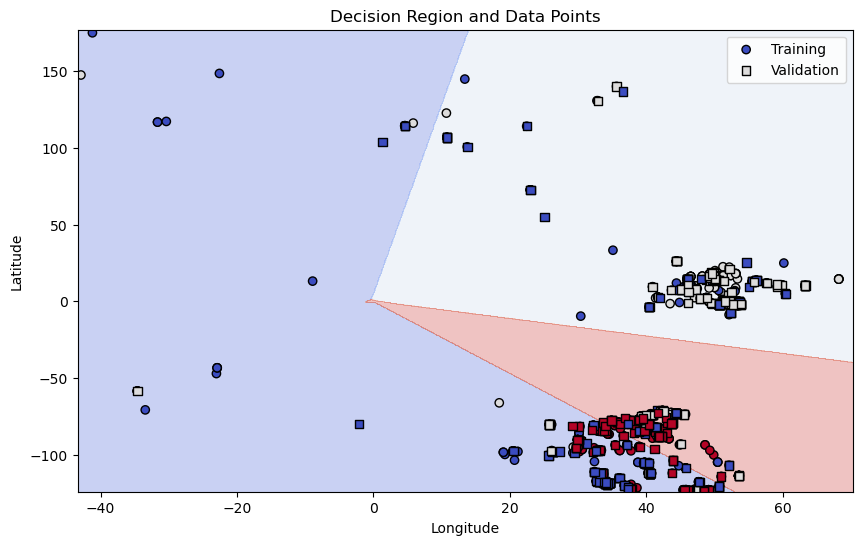

In [118]:
# YOUR CODE HERE

plot_decision_region(large_model, x_train, y_train, x_val, y_val)   

How do the decision regions differ between the tiny, large and the network you trained? Can you explain why this happens? Relate your answer to the concepts you learned in the first lectures.

**Your answer:**   
The graph currently provides a reasonable estimate of Tauros' and Seel's general locations, but it's less accurate for Diglett. This could be because Diglett is more dispersed across the entire area, making it harder for the model to capture its distribution.

## 5. Evaluation

Back to your original model. Once you achieved at least 60% accuracy in the validation set with your main model, we are done with its training. Now we'll evaluate the performance of your classifier on the test set.

Compute the accuracy on the test set.

In [120]:
main_model_test_accuracy = 0
model.eval()

with torch.no_grad():
    for inputs, labels in loader_test:
        outputs = model(inputs)

main_model_test_accuracy = accuracy(outputs,labels)
print(f"Test accuracy: {main_model_test_accuracy:.3f}.")

Test accuracy: 0.621.


In [121]:
assert main_model_test_accuracy > 0.6

Most likely, you'll get a different (slightly worse) accuracy than the one you got on the validation set. Why is this? Also, why do we need both a test and validation set?

**Your answer:**    
The validation and test sets are different subsets of data and can vary in size. The validation set is used during the model development process to evaluate and fine-tune the model. Because the model is often adjusted based on validation performance, the validation data can be seen as having been "used" in the training process. In contrast, the test set is entirely separate and untouched during the training and validation phases. It provides a final, unbiased assessment of the model's performance on new, unseen data. This separation ensures that the test set accurately reflects how the model will perform in real-world scenarios, without any influence from the model tuning process.

Next, compute the confusion matrix of your predictions on the test set and save it as `conf_mat`.

In [127]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix

model.eval()
test_labels = []
test_predictions = []

# Disable gradient calculations
with torch.no_grad():
    for x_test, y_test in loader_test:
        x_test = x_test.to(device)
        y_test = y_test.to(device)
        
        # Get model predictions
        outputs = model(x_test)
        predicted = outputs.argmax(dim=1)
        
        # Append predictions and labels to lists
        test_labels.extend(y_test.cpu().numpy())
        test_predictions.extend(predicted.cpu().numpy())

# Compute the confusion matrix
conf_mat = confusion_matrix(all_labels, all_predictions)

print(conf_mat)

[[102  31  12]
 [ 14  89  27]
 [ 25   0 113]]


In [128]:
assert isinstance(conf_mat, np.ndarray) or isinstance(
    conf_mat, torch.Tensor
), "conf_mat should be a numpy array or torch.Tensor"
assert conf_mat.shape == (3, 3), "conf_mat should have shape (3, 3), i.e. 3 classes"
assert np.sum(conf_mat) == len(
    dataset_test
), "conf_mat should sum up to the number of test samples"

What can you conclude from the computed accuracy and confusion matrix?

**Your answer:**   
We can see from the computed accuracy and confusion matrix that our classfier classifies each pokemon well. Overall, while the model shows a decent accuracy and performs well for some classes, there is room for improvement, particularly in distinguishing between some of the classes.

## 6. Exploration

You have now trained and evaluated a neural network for this particular classification task. Can you provide a brief explanation as to how you could use it to decide where to travel, if you're interested in capturing the aforementioned Pokemons?

**Your answer:**   
Use the neural network to predict the probability of finding Diglett, Seel, and Tauros at each location. Choose the Pokemon I want to capture. Seeing the prediction to find which location with the highest probability of finding the Pokemon I want to capture. Then I will decide to travcel to this location.


Is (are) there any other feature(s) from the original dataset (e.g. hour of the day, pressure, wind speed, population density, etc.) which you think would be valuable to add as an input feature to your classifier to improve its performance? 

**Your answer:**   
Incorporating additional features could improve the classifier's performance by providing more context and detail about the conditions at each location. Hour of the Day: The time of day might influence Pokémon appearances, as some Pokémon might be more common during certain times.

To investigate your hypothesis, plot a histogram of the selected feature(s) for each one of the pokemons we're interested in. For example, if you think pressure and population density are valuable for prediction, plot 6 histograms. 3 of them will be the pressure histograms for each class ('Diglett', 'Seel' and 'Tauros'), and the other 3 will be the population density for each class.

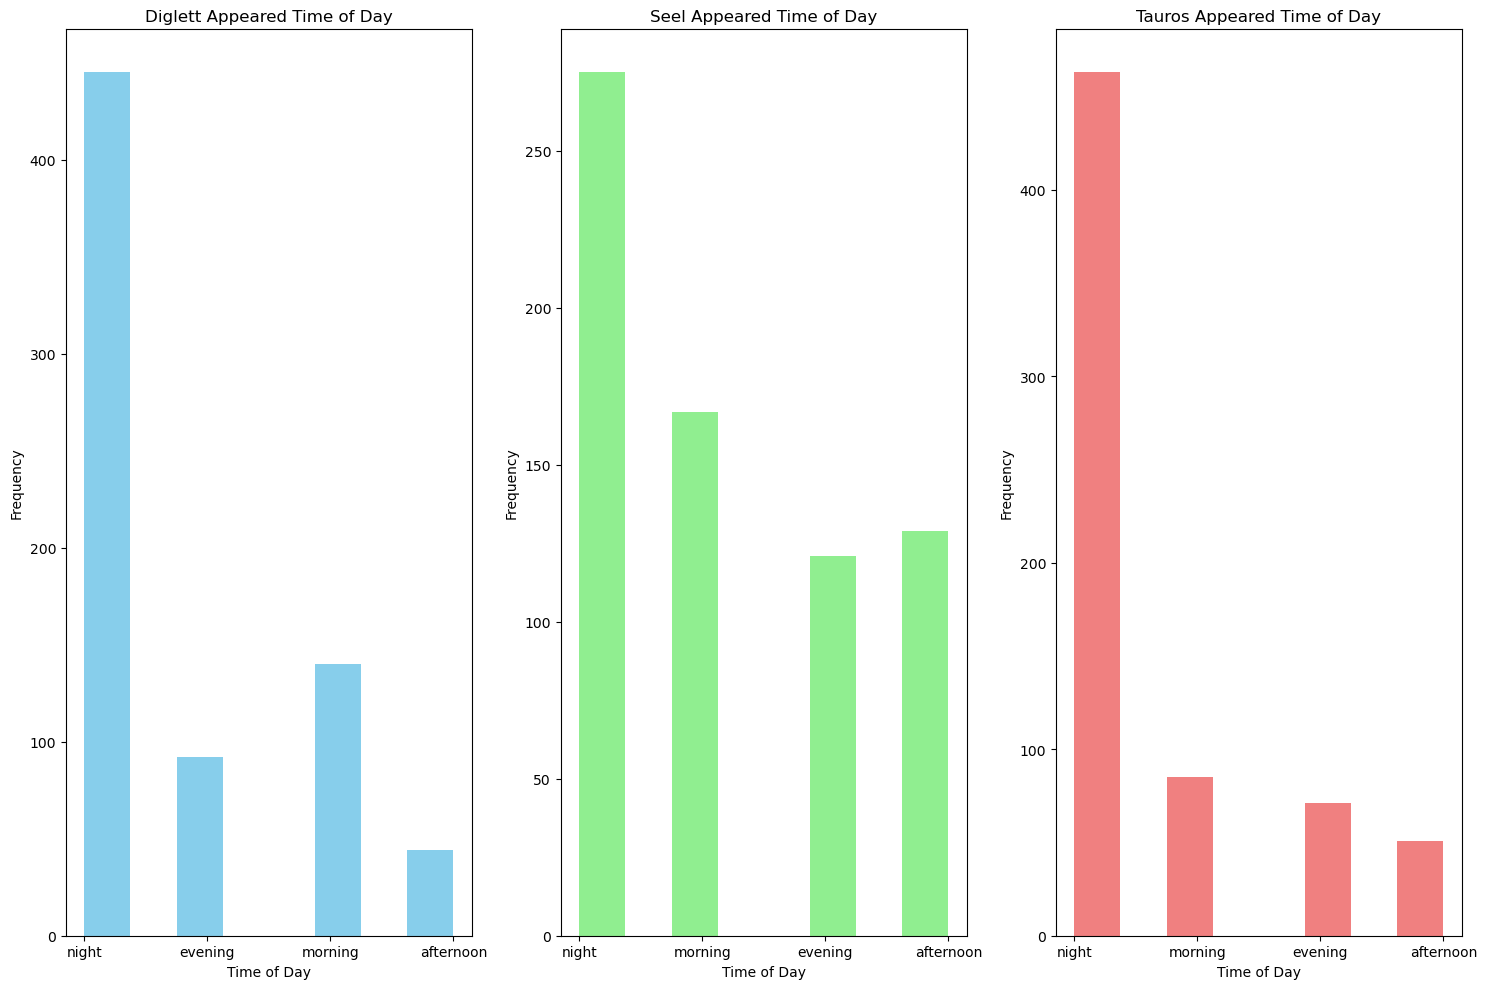

In [162]:
# YOUR CODE HERE
df = pd.read_csv("300k.csv",low_memory=False)
df = df[['appearedTimeOfDay','class']]

df["name"] = df["class"].apply(lambda x: name_dict[x])

df_Diglett = df[df["name"] == "Diglett"]
df_Seel = df[df["name"] == "Seel"]
df_Tauros = df[df["name"] == "Tauros"]


# Plot histograms
plt.figure(figsize = (15, 10))
plt.subplot(1, 3, 1)
plt.hist(df_Diglett['appearedTimeOfDay'], bins = 8, color = 'skyblue')
plt.title('Diglett Appeared Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df_Seel['appearedTimeOfDay'], bins = 8, color = 'lightgreen')
plt.title('Seel Appeared Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df_Tauros['appearedTimeOfDay'], bins = 8, color = 'lightcoral')
plt.title('Tauros Appeared Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()


What does/do this/these histogram(s) show you? Could it be beneficial to add this/these new feature(s) as input? Explain why/why not.

**Your answer:**   
The histograms reveal that all three Pokémon typically appear at night. Additionally, Seel has a notable chance of appearing in the morning. Incorporating a feature like `appearedTimeOfDay` could be very beneficial, as it offers additional information that can help the model identify more nuanced patterns and improve predictions. This enhancement is likely to lead to a more accurate and effective classifier.

The purpose was this assignment was mostly to make you design a network for classification, using this Pokemon dataset as use case. However, if you want to find those three particular Pokemons, most likely using a network for classification is not the best approach. An alternative would be to perform localization by using regression instead. **Can you state some pros and cons of approach this as a regression problem instead of a classification problem?** (We do not expect very detailed answers, you will pass the assignment as long as you make a reasonable attempt at explaining the pros and cons.)

**Your answer:** (fill in here)

## 7. (optional)

Assuming you found useful new features in the last part of this assignment, train a new classifier that uses these featues as well. Did the accuracy on the validation set improve? What's the highest accuracy you can achieve?

In [ ]:
# YOUR CODE HERE